# 🛺 **Welcome to the <font color='green'>** **Navigator Transportation Data Science Project! 🛺**</font>


---



## <font color='green'>**Project Information and Background:**</font>

**Project Description:**

This project helps in making roads safer for vulnerable road users.




---
---

## <font color='green'>**A Deeper Dive into Python Programming**</font>





Python is a programming language often used to analyze data.

Python is open-source, which means it's free to use and distribute, even for commercial purposes. Python's versatility allows it to be used for web development, data visualization, artificial intelligence, scientific computing, and more.

Python's extensive standard library, along with its powerful third-party packages, enable developers and data scientists to perform a vast array of tasks.

For those looking to practice with Python and data analysis, we recommend you begin with the Explorer TDSP. For those looking to dive deeper into Python, including advanced topics, here are some valuable resources:
- [Jobtensor Python Introduction](https://jobtensor.com/Tutorial/Python/en/Introduction) - Provides an overview of Python, including introductory to advanced concepts and tutorials.
- [The Official Python Documentation](https://docs.python.org/3/) – Offers comprehensive guides and reference materials for Python leaners.
- [Real Python](https://realpython.com/) – Provides tutorials and articles for Python developers of all skill levels.
- [PyCon](https://pycon.org/) – The largest annual gathering for the Python community, which is useful for learning from experts and discovering the latest developments in the Python ecosystem.
- [Python for Everybody](https://www.py4e.com/) – A book and website by Dr. Charles Severance that offers a free course on Python for beginners.

## <font color='green'>**Data Preparation**</font>
GOAL: The main goal of this process is to set up your environment, install the required packages,  access data and do some basic exploratory data analysis.
  

**Step 1:** Setting up libraries and installing packages

To install a library, we'll use the following format:
```python
 import <library> as <shortname>
```
We use a *short name* since it is easier to refer to the package to access functions and also to refer to subpackages within the library.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

These are the libraries that will help us throughout this project.

We encourage you to read more about the important and most commonly used libraries like Pandas, Matplotlib, and Seaborn. [You may use the Data Science Resource Repository (DSRR) to find resources to get started!](https://nebigdatahub.org/nsdc/data-science-resource-repository/)



**Step 2:**

Let’s access our data. We will be using the [NYC OpenData Motor Vehicle Collisions - Crashes dataset](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95). According to NYC Open Data, "each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC." If you need a reminder on how to upload your dataset, [please review helpful hints here.](https://nebigdatahub.org/wp-content/uploads/2023/04/NSDC-Data-Science-Projects-Introduction-Using-Google-Colab.pdf)

Since this is a large dataset, we highly recommend that you upload your data by [mounting your Google Drive](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA). Fill in the blanks below.


In [ ]:
# Mount your Google Drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#  Read the data using pandas read_csv function
data = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Crashes_20240805.csv")

<ipython-input-3-176fe79fbdc9>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/Motor_Vehicle_Collisions_-_Crashes_20240805.csv")




---



##<font color='green'> **Data Ethics, Pre-Processing, and Exploration** </font>
GOAL: The main goal of this process is to explore and better understand the dataset using charts and graphs.

References: Resources of concept of data science ethic :
- [Data Science Ethics Flashcard Video Series](https://youtube.com/playlist?list=PLNs9ZO9jGtUB7XTjXy-ttoo2QSLld9SrV&feature=shared)
- [Everyday Ethics with IBM](https://www.ibm.com/watson/assets/duo/pdf/everydayethics.pdf)
- [What Do I Need to Understand about Data Ethics?](https://www.youtube.com/watch?v=Efy8htCDueE)

**Step 1:** Computing the summary statistics for injuries and fatalities, respectively, by leveraging the describe function.

Reference:  [ Summary statistics](https://goodboychan.github.io/python/datacamp/statistics/2020/08/26/01-Summary-Statistics-with-Python.html)


In [ ]:
# Leverage the describe() function to assess the summary statistics for injuries and fatalities
injury_stats = data['NUMBER OF PERSONS INJURED'].describe()
fatality_stats = data['NUMBER OF PERSONS KILLED'].describe()
injury_stats, fatality_stats

(count    165858.000000
 mean          0.485403
 std           0.805905
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           1.000000
 max          40.000000
 Name: NUMBER OF PERSONS INJURED, dtype: float64,
 count    165858.000000
 mean          0.002719
 std           0.054452
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max           3.000000
 Name: NUMBER OF PERSONS KILLED, dtype: float64)

From the chart  created above, we can see that most crashes result in no injuries or fatalities, as evidenced by the median and 75th percentile values being 0. However, there are some severe crashes with a higher number of injuries or fatalities.

 Other insights:
> *  When crashes occur, the chances of injuring are more than the getting into fatalities as evidenced by mean values of both datas.

**Step 2:** Now, let's create a bar chart to determine which vehicle types were involved in the most **injuries *and* deaths**. In order to create a bar chart that displays two variables at very different scales, we will need to create a second axis.

 Reference: https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/

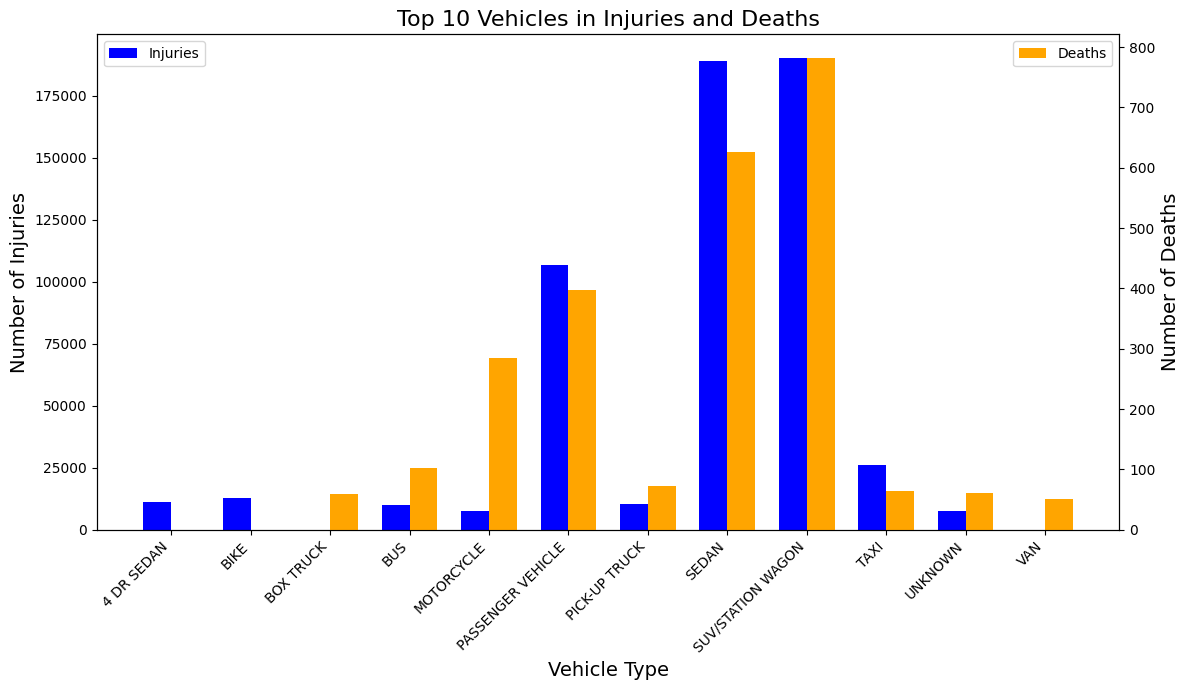

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#  Calculate top vehicles for injuries
top_vehicles_injuries = data['NUMBER OF PERSONS INJURED'].sum().sort_values(ascending=False).head(10)
#  Calculate top vehicles for deaths
top_vehicles_deaths = data.groupby('VEHICLE TYPE CODE 1')['NUMBER OF PERSONS KILLED'].sum().sort_values(ascending=False).head(10)

#  Combine the data into a DataFrame
combined_data = pd.DataFrame({'Injuries': top_vehicles_injuries, 'Deaths': top_vehicles_deaths})

# Set the width of the bars
bar_width = 0.35

# Plotting the combined bar chart with bars next to each other
fig, ax1 = plt.subplots(figsize=(12, 7))

# Generate a list of indices for the x-axis
indices = np.arange(len(combined_data))

# Plotting the bars for injuries
ax1.bar(indices - bar_width/2, combined_data['Injuries'], bar_width, color='blue', label='Injuries')

#  Create a secondary y-axis for deaths
ax2 = ax1.twinx()#creates a new y-axis that shares the same x-axis as ax1.

# Plotting the bars for deaths next to injuries
ax2.bar(indices + bar_width/2, combined_data['Deaths'], bar_width, color='orange', label='Deaths')

# Adding labels and title
ax1.set_title('Number of Injuries & Deaths for each Vehicle Type', fontsize=16)
ax1.set_xlabel('Vehicle Type', fontsize=14)
ax1.set_ylabel('Number of Injuries', fontsize=14)
#  Set the label for the secondary y-axis
ax2.set_ylabel('Number of Deaths', fontsize=14)
ax1.set_xticks(indices)
ax1.set_xticklabels(combined_data.index, rotation=45, ha='right')

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjusting layout and displaying the combined chart
plt.tight_layout()
plt.show()






Create a new bar chart below by converting all variables to UPPER CASE, and combining any repetitive variables.






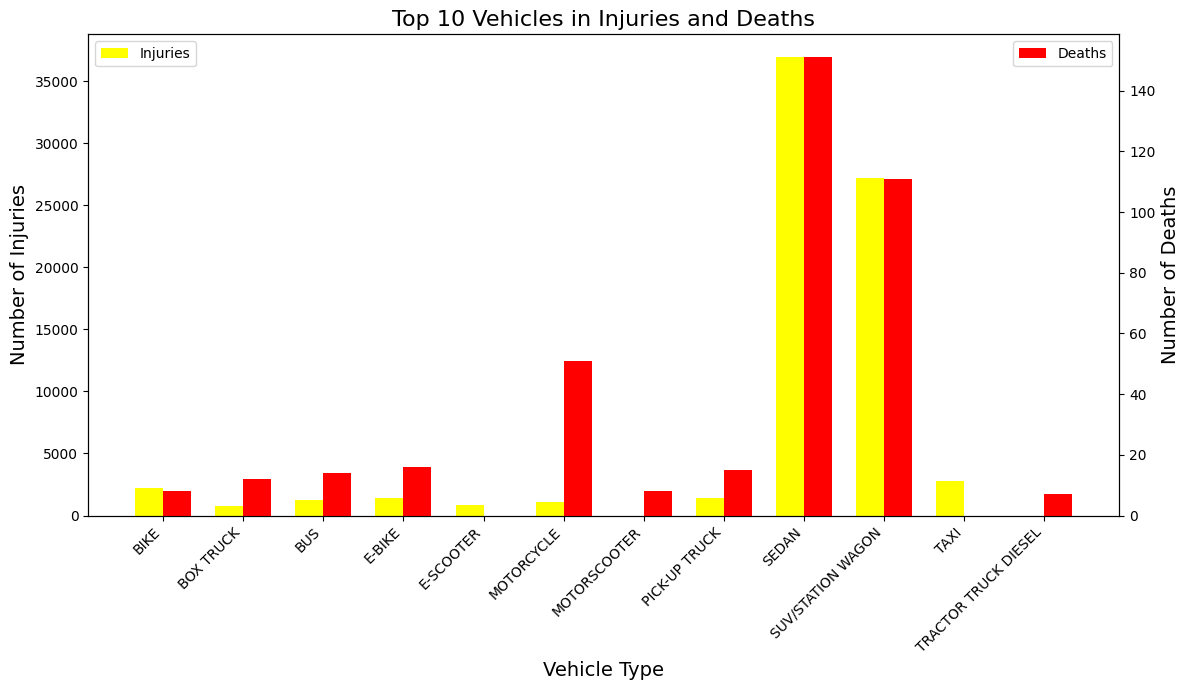

In [ ]:
#  Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#  Convert all variables in a specific column to upper case
data['VEHICLE TYPE CODE 1'] = data['VEHICLE TYPE CODE 1'].str.upper()

# Combine any repetitive variables
vehicle_types_to_combine = ['STATION WAGON/SPORT UTILITY VEHICLE', 'SPORT UTILITY / STATION WAGON']
#  Replace specified values with a common label in a column
data['VEHICLE TYPE CODE 1']= data['VEHICLE TYPE CODE 1'].replace(vehicle_types_to_combine, 'SUV/STATION WAGON')
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Re-run code from above
top_vehicles_injuries = data.groupby('VEHICLE TYPE CODE 1')['NUMBER OF PERSONS INJURED'].sum().sort_values(ascending=False).head(10)
top_vehicles_deaths = data.groupby('VEHICLE TYPE CODE 1')['NUMBER OF PERSONS KILLED'].sum().sort_values(ascending=False).head(10)
combined_data = pd.DataFrame({'Injuries': top_vehicles_injuries, 'Deaths': top_vehicles_deaths})
bar_width = 0.35
fig, ax1 = plt.subplots(figsize=(12, 7))
indices = np.arange(len(combined_data))
ax1.bar(indices - bar_width/2, combined_data['Injuries'], bar_width, color='yellow', label='Injuries')
ax2 = ax1.twinx()
ax2.bar(indices + bar_width/2, combined_data['Deaths'], bar_width, color='red', label='Deaths')
ax1.set_title('Top 10 Vehicles in Injuries and Deaths', fontsize=16)
ax1.set_xlabel('Vehicle Type', fontsize=14)
ax1.set_ylabel('Number of Injuries', fontsize=14)
ax2.set_ylabel('Number of Deaths', fontsize=14)
ax1.set_xticks(indices)
ax1.set_xticklabels(combined_data.index, rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


 The top 3 vehicles that were **most** involved in crashes that resulted in **injuries:**

> *  Sedans
> *  Station Wagons
> *  Taxi

 The top 3 vehicles that were **most** involved in crashes that resulted in **deaths:** Sedans, Station wagons and motor cycles.

> *  The motor cycles differ from those that were most involved in **injuries**

The vehicles are most involved in injury-causing and death-causing crashes

> *  may be due to their design like height etc. and purposeful utility.

Recommendations  to the Dept. of Transportation based on the data above:

> *  More attention is needed to the vehicles owned by single persons and on passenger vehicles than on goods transporters

---

##<font color='green'> **Advanced Time Series Analysis**</font>
GOAL: The main goal of this process is to dive deeper into Time Series Analysis in order to better understand our data's trends over time.

**Step 1:**

Before we jump into Time Series Analysis (TSA), it's important to understand the foundations, including Trends, Seasonality, and Residual Components.

References:

*  [Time Series patterns ](https://otexts.com/fpp2/tspatterns.html)
* [ Time Plots ](https://otexts.com/fpp2/time-plots.html)
*[How to decompose Time Series Data into Trend and Seasonality](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)


**Step 2:** Begin by creating a chart that displays the average number of crashes per day of the week, including Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, & Sunday.

<ipython-input-7-69c8de3bc24f>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


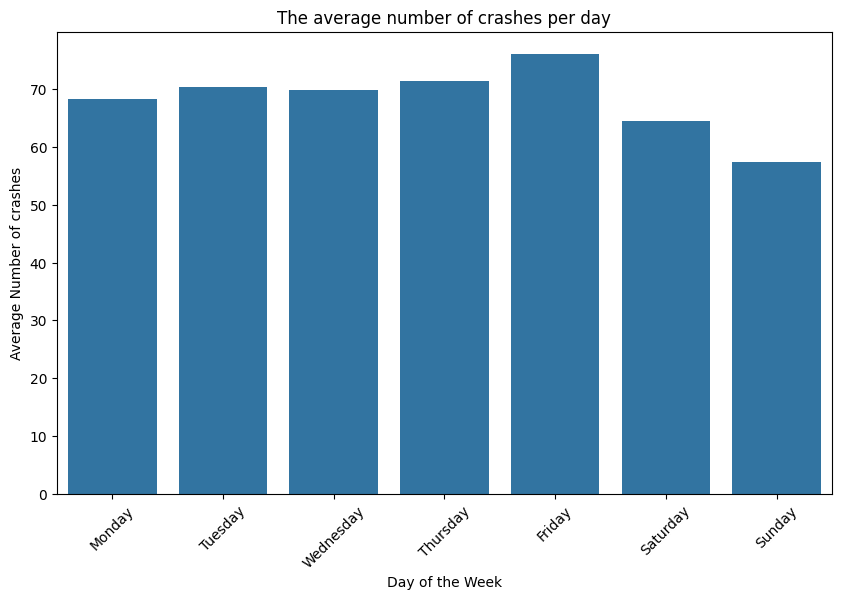

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = "/content/Motor_Vehicle_Collisions_-_Crashes_20240805.csv"
data = pd.read_csv(file_path)

#  Convert 'CRASH DATE' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Day of the Week Analysis
#  Add a new column for the day of the week from 'CRASH DATE'
data['Day of Week'] = data['CRASH DATE'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by 'Day of Week' and calculate the average number of crashes per day
average_crashes_per_weekday = data.groupby('Day of Week').size() / data['CRASH DATE'].nunique()

# Plot the average number of crashes
plt.figure(figsize=(10, 6))
#  Plot a bar chart with seaborn
sns.barplot(x=average_crashes_per_weekday.index, y=average_crashes_per_weekday.values, order=day_order)
plt.title('The average number of crashes per day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of crashes')
plt.xticks(rotation=45)
plt.show()



> *  Friday  sees the most crashes. This might be due to the weekend travel plans and rushes



> *  Saturday and Sunday sees the least crashes compared to any other day of the week. Of these two days, Sunday sees the least crashes and this might be due to most of the people might be relaxing and gearing up for the next working week and left the roads to those returning from their travels.


**Step 3:** [Stationarity Check](https://otexts.com/fpp2/stationarity.html)! Time series data should be stationary for most forecasting methods to work effectively. Let's check if the series is stationary and apply transformations if necessary, leveraging the [Augmented Dickey-Fuller test](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/).

In [ ]:
from statsmodels.tsa.stattools import adfuller

#  Count the number of crashes per day
daily_crashes = data.groupby('CRASH DATE').size()

# Perform Augmented Dickey-Fuller test
#  Use adfuller to test if daily crashes are stationary
adf_test = adfuller(daily_crashes)

# Display the ADF test results
#  Create a pandas Series to nicely display test results
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value

#  Print the ADF test output
print(adf_output)


Test Statistic                   -1.307775
p-value                           0.625608
#Lags Used                       29.000000
Number of Observations Used    4383.000000
Critical Value (1%)              -3.431843
Critical Value (5%)              -2.862200
Critical Value (10%)             -2.567121
dtype: float64


[Reference: Test statistics and P-values](https://www.investopedia.com/terms/p/p-value.asp). The results of the Augmented Dickey-Fuller (ADF) test below:

Test Statistic: -1.307

p-value: 0.625

The p-value is greater than the common significance level (0.05), indicating that we *fail to reject the null hypothesis*. Therefore, we can infer that the time series is *not stationary*.
We typically apply differencing to make the series stationary. After differencing, we can recheck for stationarity and then proceed with selecting and fitting an appropriate forecasting model.

**Step 4:** In order to make the series stationary, let's apply differencing. [Reference: Time Series Differencing](https://www.influxdata.com/blog/time-series-differencing-complete-guide-influxdb/).

In [ ]:
#  Apply first differencing
daily_crashes_diff = daily_crashes.diff().dropna()

# Perform Augmented Dickey-Fuller test on the differenced series
#  Use adfuller to test if the differenced series is stationary
adf_test_diff = adfuller(daily_crashes_diff)

# Display the ADF test results for the differenced series
#  Create a pandas Series to nicely display test results
adf_output_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in adf_test_diff[4].items():
    adf_output_diff[f'Critical Value ({key})'] = value

#  Print the ADF test output for the differenced series
print(adf_output_diff)



Test Statistic                -1.880382e+01
p-value                        2.022727e-30
#Lags Used                     2.800000e+01
Number of Observations Used    4.383000e+03
Critical Value (1%)           -3.431843e+00
Critical Value (5%)           -2.862200e+00
Critical Value (10%)          -2.567121e+00
dtype: float64


The results of the Augmented Dickey-Fuller test on the differenced series are:

Test Statistic: Approximately -18.19

p-value: Approximately 0

The p-value here is 2.02e-30 is significantly lower than common significance level (0.05).

 Since the p-value is lower than the common significance level (0.05),the null hypothesis is  rejected.

> *  This means that the data  observed is likely enough to have occurred under the null hypothesis, and that our sample provides reasonable evidence to support the alternative hypothesis



> *  Since the test statistic (-18.80382) is significantly less than all the critical values, and the p-value is extremely small, you can confidently reject the null hypothesis that the differenced series has a unit root. This indicates that the *** differenced series is stationary.***

**Step 5:** Create an ARIMA Model for Time Series forecasting.

An ARIMA model, also known as an AutoRegressive Integrated Moving Average model, is a statistical method that allows you to analyze and forecast time series data.

[Reference: the ARIMA model, how to fit the model, and how to configure the model.](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)   



In [ ]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvt72oca/1amdqxph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvt72oca/9ewkmfak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99545', 'data', 'file=/tmp/tmpyvt72oca/1amdqxph.json', 'init=/tmp/tmpyvt72oca/9ewkmfak.json', 'output', 'file=/tmp/tmpyvt72oca/prophet_modelpbqzjymw/prophet_model-20240805174159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:41:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:42:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

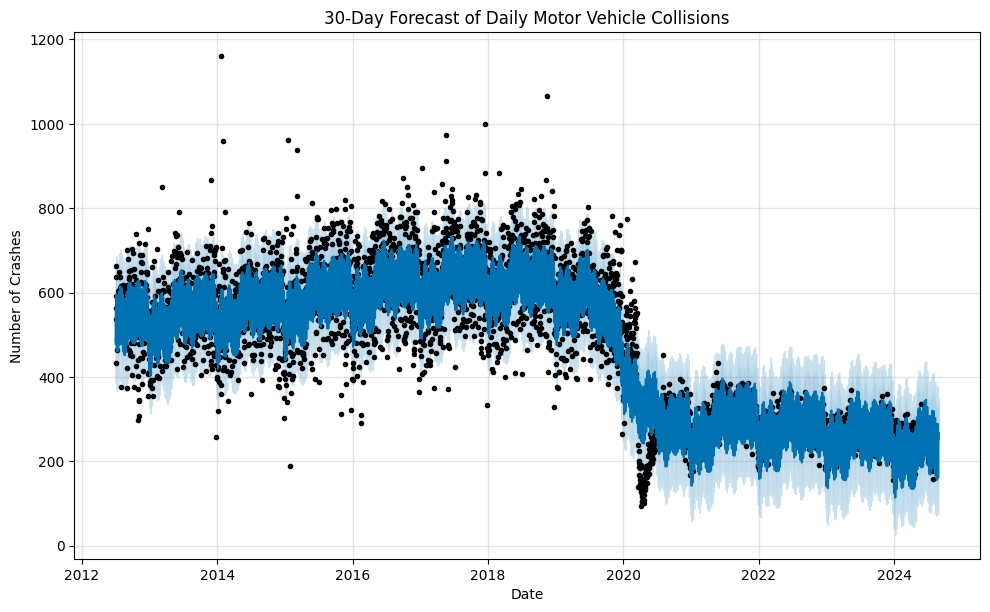

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

#  Convert the 'CRASH DATE' column to datetime format. Replace 'CRASH DATE' if your date column has a different name.
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

#  Group data by 'CRASH DATE' and count the crashes. Assign this to a new DataFrame called 'daily_crashes'.
daily_crashes = data.groupby('CRASH DATE').size().reset_index(name='crash_count')

#  Rename the columns of 'crash_count' to 'y' for Prophet compatibility.
daily_crashes.rename(columns={'CRASH DATE': 'ds', 'crash_count': 'y'}, inplace=True)

model = Prophet()
model.fit(daily_crashes)

#  Create a future dataframe for forecasting the next 30 days and assign it to a variable called 'future'.
future = model.make_future_dataframe(periods=30)

#  Use the model to make predictions on the 'future' DataFrame and store the result in a variable called 'forecast'.
forecast = model.predict(future)

#  Plot the forecasted data using the Prophet's built-in plot function.
fig = model.plot(forecast)
plt.title('30-Day Forecast of Daily Motor Vehicle Collisions')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.show()


###Understanding the plot

Black Dots: Each black dot represents the actual number of crashes recorded on a given day.

Dark Blue Line: The dark blue line shows the ***predicted median number of crashes per day***. This is the model's best guess for the central tendency of crashes for future dates.

Light Blue Shaded Area: The light blue shaded area around the dark blue line represents the* uncertainty interval of the forecast.*  The wider this area, the higher the uncertainty. It's usually narrow close to the last observed data point and widens as you move further into the future, indicating increasing uncertainty in the forecast.

Forecast Period: The forecast itself happens after the last available actual data point. If the graph is not clearly demarcated, you would look for the point where there are no more black dots, and the blue line continues. *This continuation beyond the last black dot into the light blue area is the forecasted period.*

The graph represents a time series forecasting mondel.

* The shaded area represents the uncertainty intervals around the forecast.
* The forecast seems to continue the recent downward trend in the number of crashes.
* The uncertainty interval grows as the forecast extends further into the future, which is common in time series forecasting due to the compounding of errors.

Insights from the above ARIMA model based on  forecast:
> * This downward trend could be indicative of improvements in road safety measures, better traffic management, or seasonal effects that historically correlate with fewer crashes.

>* The increasing uncertainty emphasizes that while the model provides a likely scenario, there is also a range of possible outcomes that become less predictable the further out the forecast extends.

Recommendations for the Dept. of Transportation:
>* Since the forecast predicts a downward trend, it's crucial to maintain or even strengthen the current safety measures and policies that are likely contributing to this decline in crashes.
>* Given the growing uncertainty in the longer-term forecast, the Department of Transportation should be prepared for potential deviations from the expected trend.
>* Special attention should be given to high risk periods with proactive measures, such as deploying additional traffic enforcement or launching targeted safety campaigns during these times.
> * Use the forecast to guide long-term planning and resource allocation. For example, if the forecast suggests a continued decline, resources could be gradually shifted from reactive measures (like emergency response) to preventive measures (like road maintenance and driver education).
>* Clearly communicate the forecast and its associated uncertainties to all relevant stakeholders, including city planners, law enforcement, and the general public. Transparency will help in aligning efforts and setting realistic expectations about future road safety outcomes.

*By acting on these recommendations, the Department of Transportation can better manage and reduce crash occurrences, even as they navigate the inherent uncertainties of future forecasts.*


---

##<font color='green'>**Spatio-Temporal Analysis**</font>
GOAL: The main goal of this process is to explore data that is collected across both space (spatio) and time (temporal), and to get comfortable with spatio-temporal visualizations.

**Step 1:** [Reference:Spatio-Temporal Data Analysis](https://www.heavy.ai/technical-glossary/spatial-temporal) . Let's  create visualizations that demonstrate the spatio-temporal [correlation](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-correlation.html) of collisions and  plot the yearly collision frequencies by borough to see if there are any patterns.


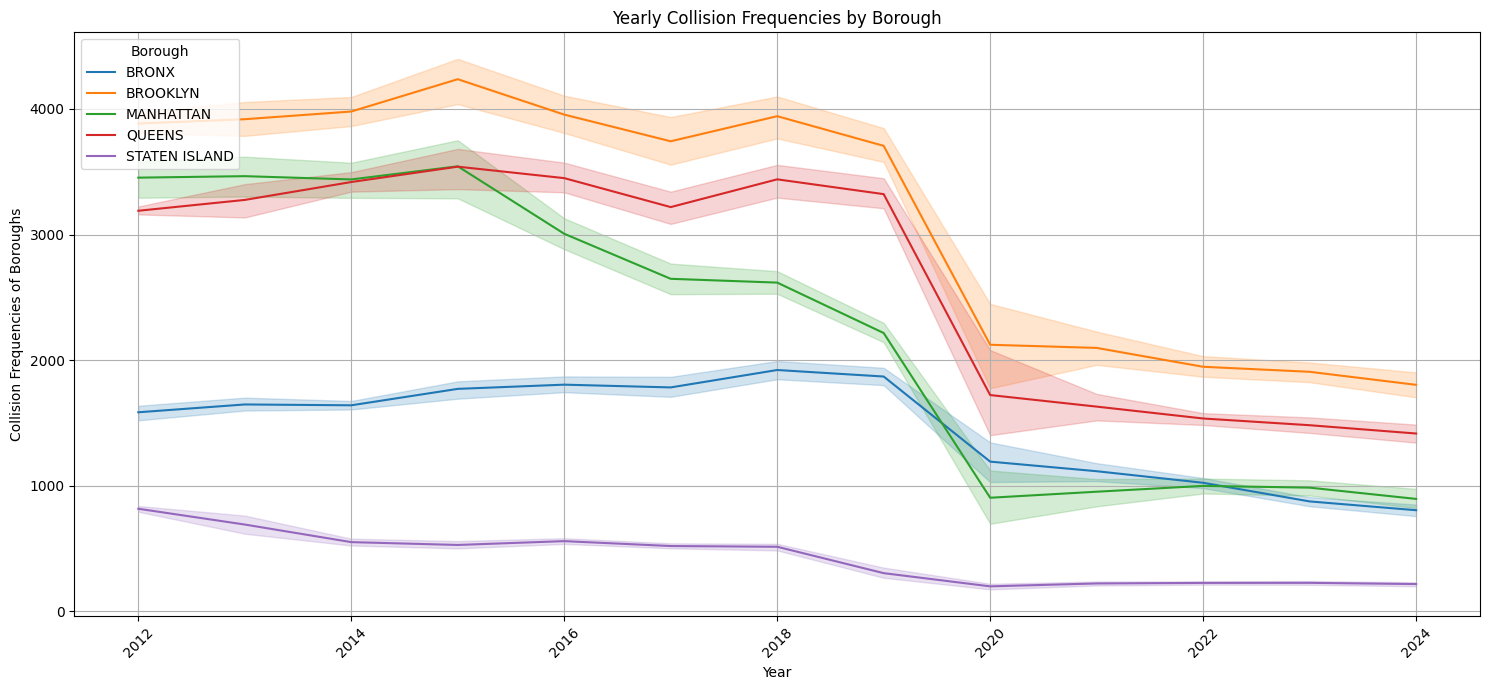

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'CRASH DATE' to datetime and extract year and month for easier analysis
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['YEAR'] = data['CRASH DATE'].dt.year
data['MONTH'] = data['CRASH DATE'].dt.month

# Analyzing collision frequencies over time in different boroughs
# Grouping data by Year, Month, and Borough and counting collisions
borough_yearly = data.groupby(['YEAR', 'MONTH', 'BOROUGH'])['CRASH DATE'].count().reset_index(name='Collisions')

# Plotting the data
plt.figure(figsize=(15, 7))
#  Use seaborn to create a line plot
sns.lineplot(data=borough_yearly, x='YEAR', y='Collisions', hue='BOROUGH') # Specify x, y, and hue for clarity
plt.title('Yearly Collision Frequencies by Borough')
plt.ylabel('Collision Frequencies of Boroughs')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Borough', loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

**Step 2:** Now, let's analyze the distribution of crashes by month and borough. To do this, we will create a heatmap.

References:
  [different types of heatmaps we can create in Python](https://python-graph-gallery.com/90-heatmaps-with-various-input-format/)

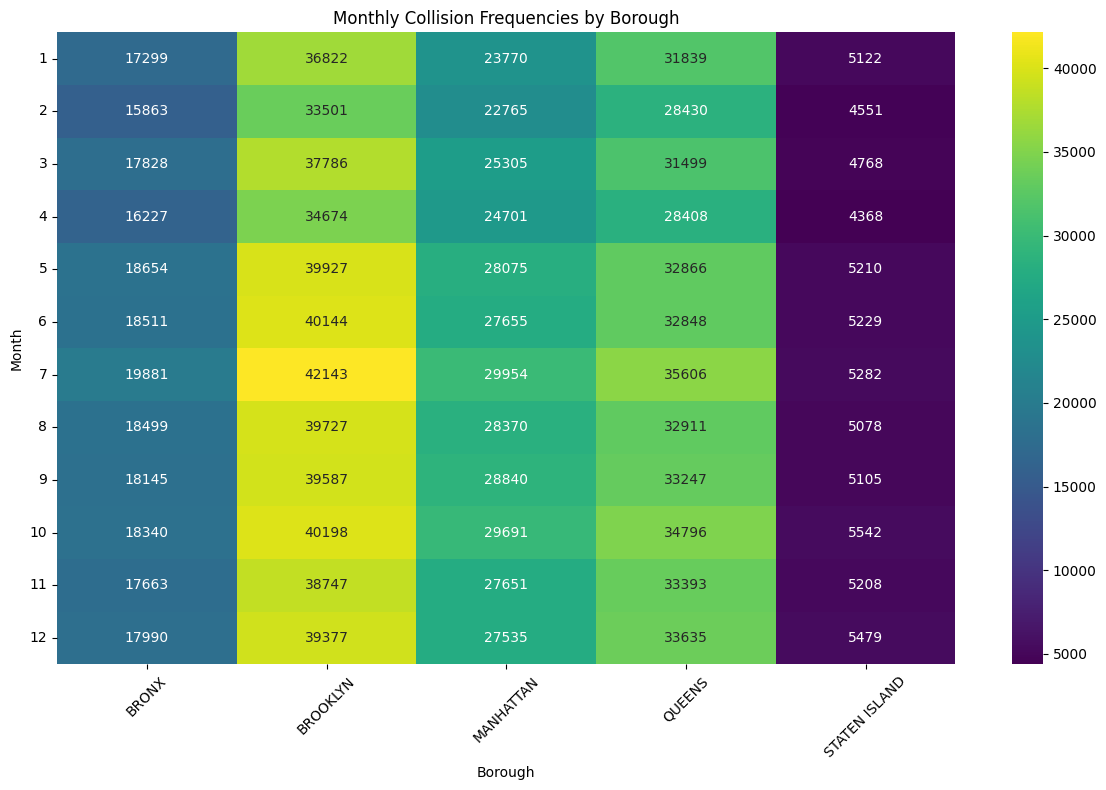

In [ ]:
# Analyzing specific times or locations with unusually high numbers of crashes
# For this, we will use a heatmap to visualize the distribution of crashes by month and borough

# Grouping data by Month and Borough
borough_monthly = data.groupby(['MONTH', 'BOROUGH']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
#  Create a heatmap to visualize the frequencies
sns.heatmap(borough_monthly, cmap='viridis', annot=True, fmt='d')
plt.title('Monthly Collision Frequencies by Borough')
plt.ylabel('Month')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


The  insights gained from the above two visualizations:

> *  Brooklyn aand Staten Island has the highest and least number of crashes monthly wise too respectively.
> *  July and February has the highest and the least crashes respectively across all the boroughs
> *  The trace of increase began in May and lasted till October months boroughwise
> *  Boroughwise order of collisions is as : Brooklyn, Queens, Manhattan, Bronx and Staten Island. This order reamined the same across the years for Brooklyn, Queens and Staten Island.
> *  Collisions in Brooklyn and Queens cumulatively accounts  majority  and the other three collectively accounts equivalent number of crashes as Brooklyn+Queens.
> * Collision frequencies showed a decline from the year 2018 and continued till 2024
> * Collisions has significantly decreased in Brooklyn, Queens, Manhattan across all the years ranging from 2012-2024. Especially Manhattan has shown drastic decrease in collision frequencies beginning around 2015. Manhattan showed higher collision frequencies than Queens during 2012-14 and showed spike till 2015 keeping the frequencies similar tothat of Queens and decreased later significantly to the range of frequencies of Bronx.


 **Recommendations**   to the Dept. of Transportation based on these insights:

 > * More attention and support of infrastructure is needed in Brooklyn and Queens of NYC when compared to other locations of NYC.

 > * Manhattan  has showed significant decrease in collisions across the years compared to others and so it  has to be analyzed  with proper attention by the Dept. and implement those   measures/steps which resulted so in other locations too if possible. Not only manhattan but also Brooklyn and Queens has shown drastic decrease in collisions across the years, these should also be considered for the further analysis and implement necessary steps from the insights obtained wherever necessary on behalf of Dept.

 > * The changes observed in the attitude of vehicle users, vehicular designs, most used vehicles from the year 2018 and the actions/ steps and infrastructural changes and support on behalf of Transportation department has to  be analyzed and keep continuing those that contribute towards the decrease and eradication of motor vehicle crashes.




**Step 3:** A correlation matrix for the number of collisions in different boroughs across different years.  [ Descriptive Statistics Flashcard Video Series ](https://youtube.com/playlist?list=PLNs9ZO9jGtUBQfxw7YAmtZJPRiEpnwaNc&feature=shared)!

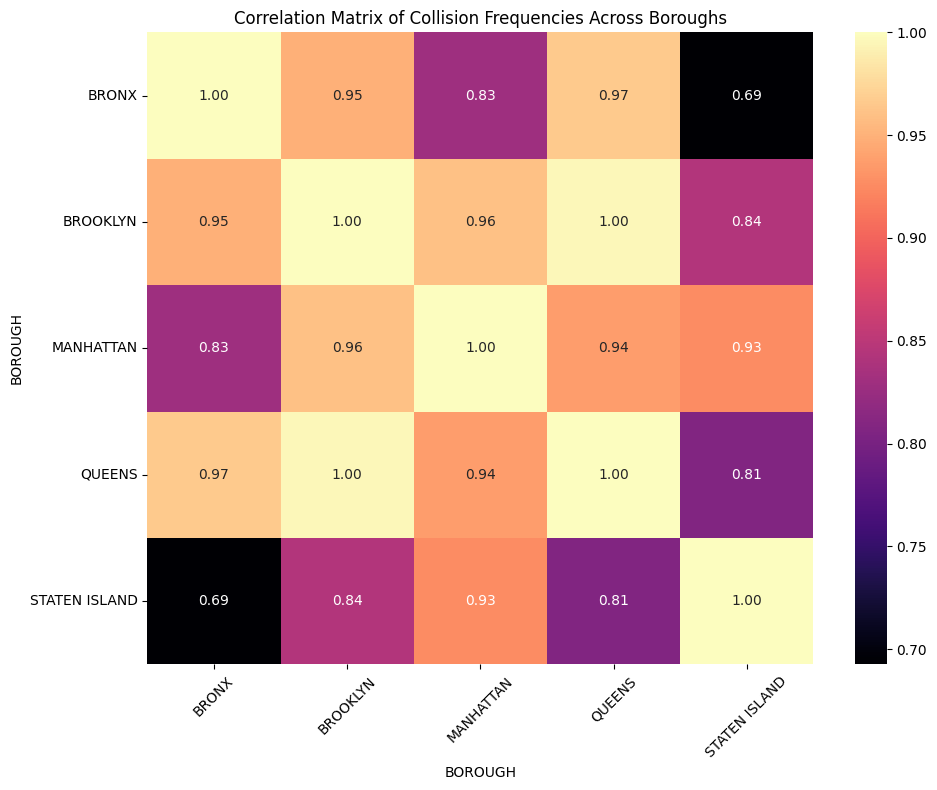

In [ ]:
#  'borough_yearly' is  DataFrame with collision counts by borough and year
# Pivot the DataFrame to have boroughs as columns and years as index
borough_yearly_pivot = borough_yearly.pivot_table(index='YEAR', columns='BOROUGH', values='Collisions', fill_value=0)

# Calculate the correlation matrix
correlation_matrix = borough_yearly_pivot.corr()

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Matrix of Collision Frequencies Across Boroughs')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

The correlation matrix provides a visual and numerical representation of the relationships between collision frequencies across different boroughs over the years. Values close to 1 indicate a strong positive correlation, meaning that as collisions increase in one borough, they tend to also increase in the other. Values close to -1 indicate a strong negative correlation, and values around 0 suggest no significant correlation.



Based on the information above, the following boroughs are the most and least correlated?
> *  Most: Queens vs Brooklyn ->1.0
          *Queens has shown strong positive correlation with all other locations*
> *  Least: Bronx vs Staten Island ->0.69

Overall, all the locations show correlation with one another positively as evidenced above with a correlation value of  0.7 and above.

The reason that certain boroughs are more correlated than others:
> *  Some shared pattern exists between them.
Here Queens and Brooklyn are the most correlated ones as their collision frequencies are similar in range.

Also, it can be noticed that:
> * Manhattan shows similar correlation with all locations except Bronx with a variation.
> * Staten Island shows more collelated wth Manhattan when compared with other locations.

**Recommendations** to Dept.

As all the locations are correlated with one another strongly, the measures that are working in favour of reduction of motor vehicle collisions could be implemented in all the above locations of NYC specified here.

##<font color='green'>**Location Inequality**</font>
GOAL: The main goal of this process is to think about the implications of this data.

**Step 1:** Analysis of the data to research the following question:

Is there any location inequality in terms of automobile crash rates, pedestrian fatality and injury? What is the relationship between pedestrian fatalities and neighborhood poverty of residence?






 Emphasizing the measurement of the "inequality" factor in crash rates: [detecting the change of point](https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/how-change-point-detection-works.htm). We can further investigate whether distinct locations exhibit similar points of change.

In [4]:
!pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.2 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.3 MB/s eta 0:00:00
[25, 45, 55, 60, 105, 110, 130, 180, 305, 355]


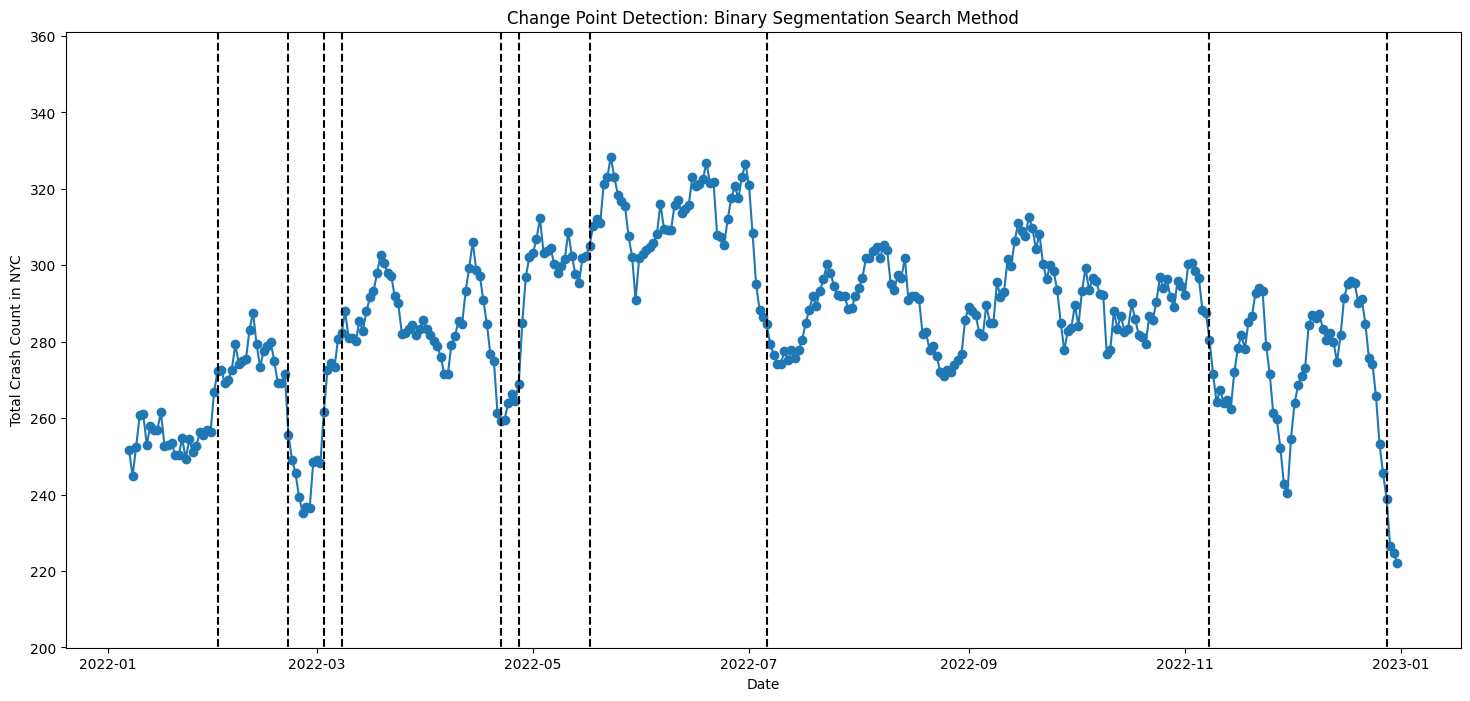

In [4]:
# install and import the package for the change-of-point detection

import ruptures as rpt

# aggrate the total crash by dates
Counts=data["CRASH DATE"].value_counts()
Counts.index = pd.to_datetime(Counts.index)
Counts.sort_index(inplace=True)
Counts_2022 = Counts.loc['2022-01-01':'2022-12-31'].rolling(7).mean().dropna()


# implement the algorithm
model = "l2"
algo = rpt.Binseg(model=model).fit(Counts_2022.to_numpy())
my_bkps = algo.predict(n_bkps=10)
# show results
fig, ax = plt.subplots(figsize=(18,8))
ax = plt.gca()
ax.plot_date(Counts_2022.index, Counts_2022.to_numpy(), linestyle='solid')
#rpt.show.display(Counts_2022.to_numpy(), my_bkps, figsize=(10, 6))
plt.ylim([0.9*Counts_2022.min(), 1.1*Counts_2022.max()])

# changing point
my_bkps.pop()
for ix in my_bkps:
    plt.plot([Counts_2022.index[ix], Counts_2022.index[ix]], [0,1000], '--k')

plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.ylabel("Total Crash Count in NYC")
plt.xlabel("Date")
print(my_bkps)

In [39]:
Counts_2022.head()

CRASH DATE
2022-01-07    251.571429
2022-01-08    244.857143
2022-01-09    252.571429
2022-01-10    260.714286
2022-01-11    261.000000
Name: count, dtype: float64

Duration : January 2022 - January 2023:

The change year began in July 2022 which is a point of decrease of crashes whereas the the change point with showsthe drastic change in decrease in number of crashes is January 2023.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Load the dataset
# data = pd.read_csv('path_to_crash_data.csv')

# Convert 'CRASH DATE' to datetime
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Group by location and date, then aggregate crash counts
location_groups = data.groupby('LOCATION')
location_crash_data = {}

for location, group in location_groups:
    # Aggregate total crashes by date for each location
    Counts = group["CRASH DATE"].value_counts()
    Counts.index = pd.to_datetime(Counts.index)
    Counts.sort_index(inplace=True)
    Counts_2022 = Counts.loc['2022-01-01':'2022-12-31'].rolling(3).mean().dropna()

    # Store the time series data for change point detection
    location_crash_data[location] = Counts_2022




Streaming output truncated to the last 5000 lines.
Skipping (40.886612, -73.90703) due to insufficient data.
Skipping (40.886616, -73.81012) due to insufficient data.
Skipping (40.886616, -73.82586) due to insufficient data.
Skipping (40.886616, -73.85671) due to insufficient data.
Skipping (40.8866176, -73.8567546) due to insufficient data.
Skipping (40.886623, -73.90013) due to insufficient data.
Skipping (40.886623, -73.910446) due to insufficient data.
Skipping (40.88663, -73.87834) due to insufficient data.
Skipping (40.88663, -73.900154) due to insufficient data.
Skipping (40.886635, -73.831055) due to insufficient data.
Skipping (40.886635, -73.88746) due to insufficient data.
Skipping (40.886635, -73.905624) due to insufficient data.
Skipping (40.8866388, -73.8262089) due to insufficient data.
Skipping (40.8866393, -73.8874461) due to insufficient data.
Skipping (40.88664, -73.82408) due to insufficient data.
Skipping (40.886642, -73.85946) due to insufficient data.
Skipping (4

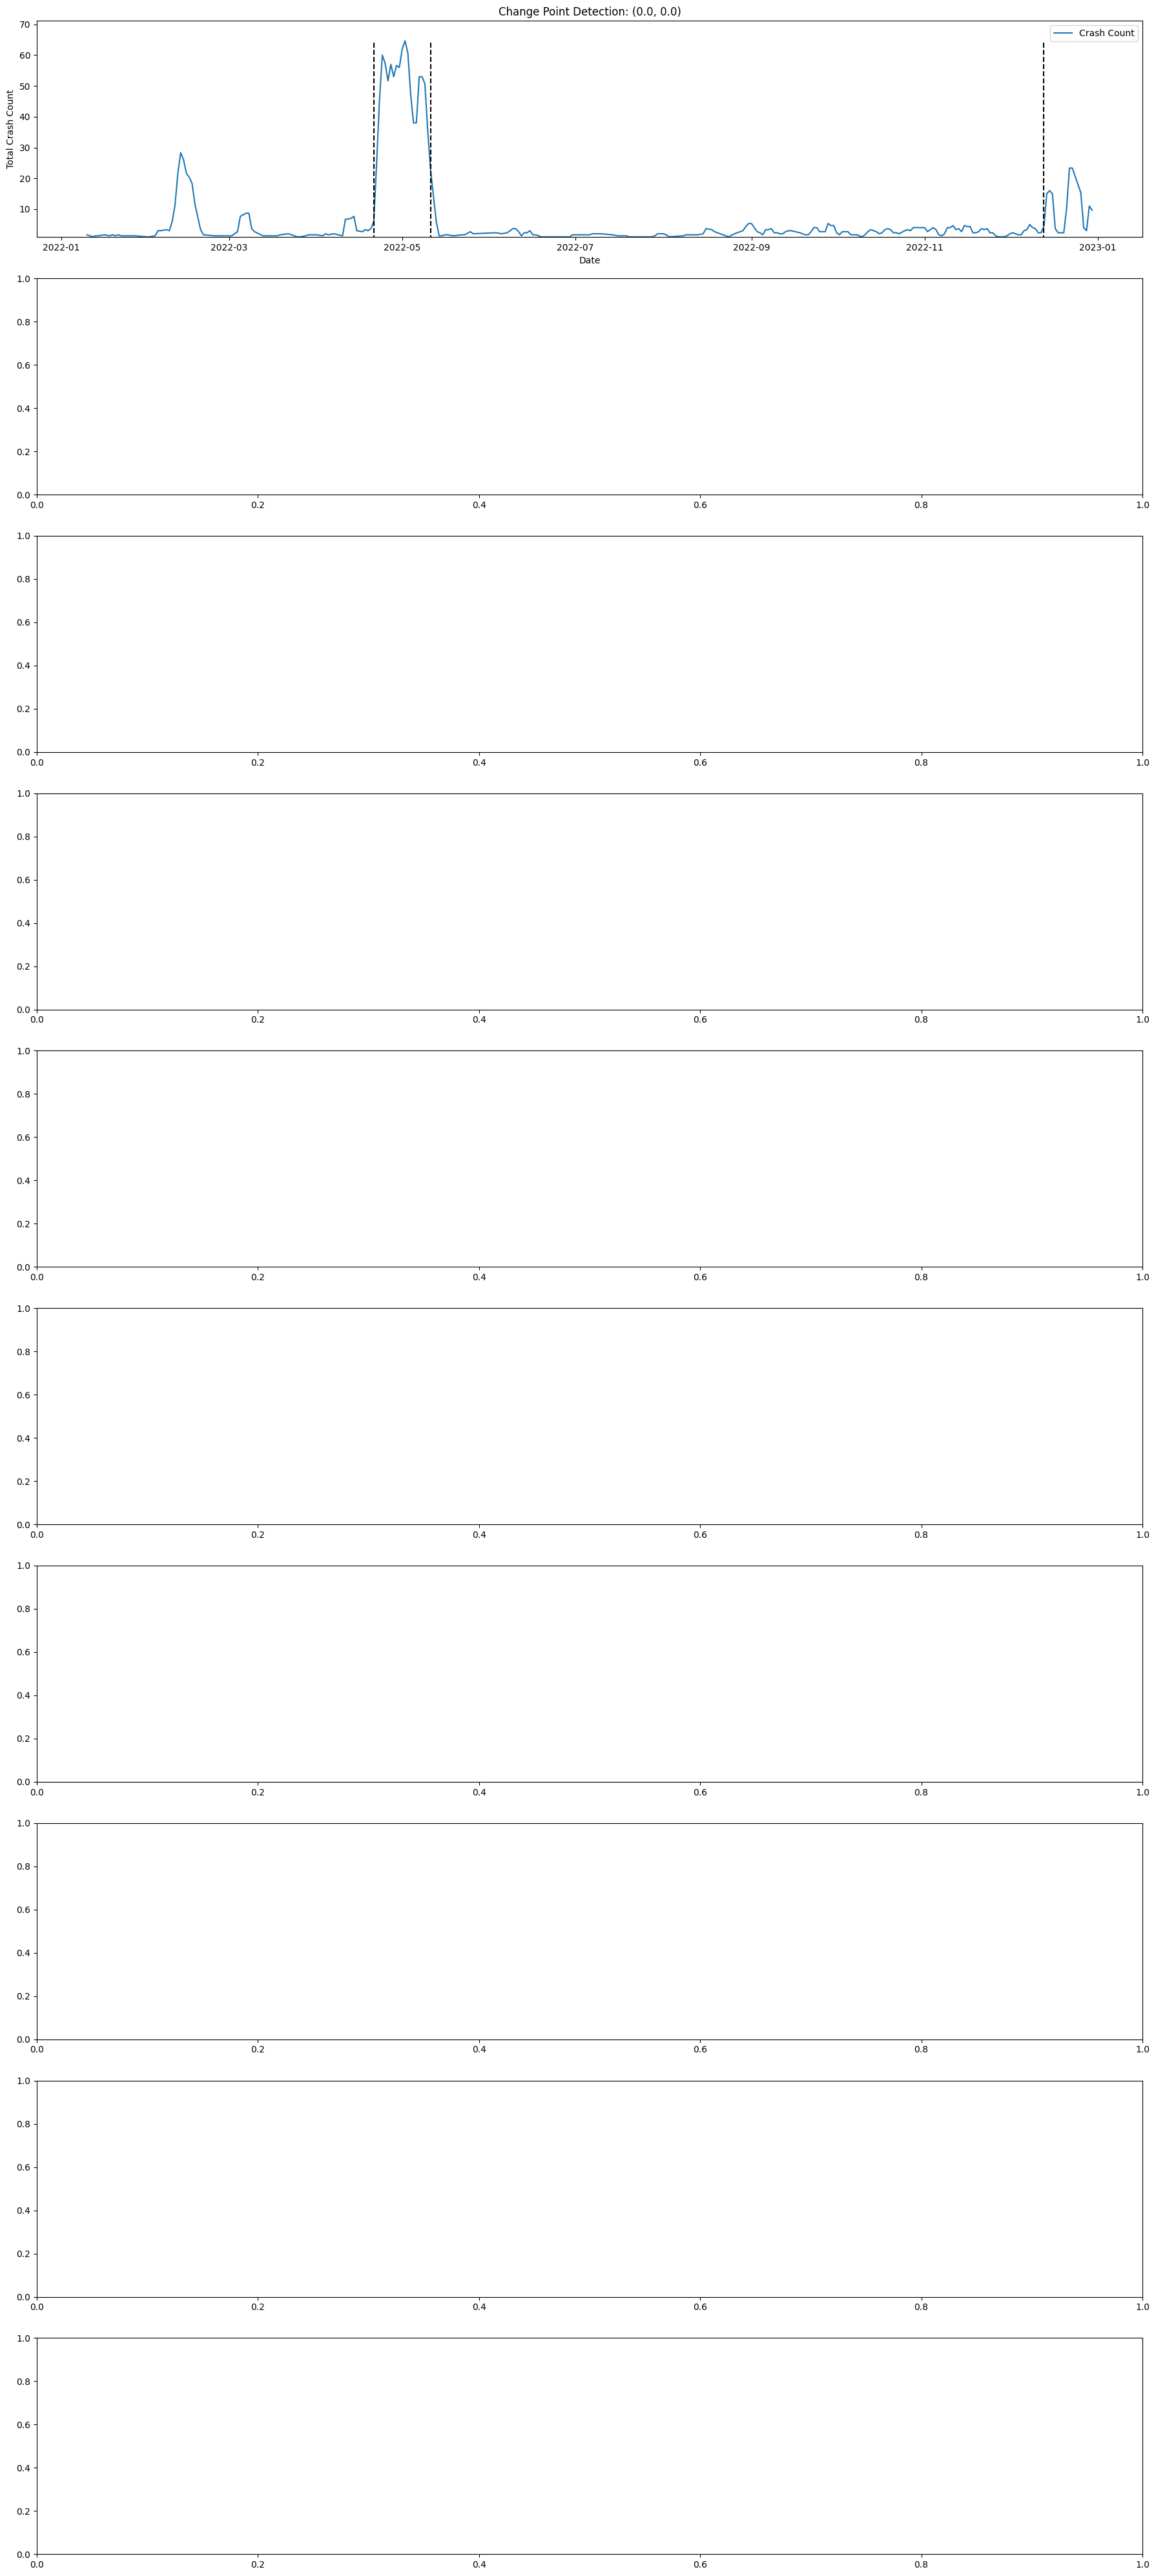

(0.0, 0.0): Change Points at [65, 85, 245]
(40.60567, -74.030945): Change Points at [25, 35]
(40.60981, -73.92251): Change Points at [20]
(40.63082, -73.88636): Change Points at [20]
(40.64254, -73.87652): Change Points at [10]
(40.651863, -73.86536): Change Points at [15]
(40.651974, -73.86542): Change Points at [10]
(40.652767, -73.8863): Change Points at [10]
(40.658577, -73.89063): Change Points at [40, 45]
(40.665726, -73.96425): Change Points at [5]
(40.666233, -73.761): Change Points at [20]
(40.666706, -73.871826): Change Points at [20]
(40.667076, -73.99508): Change Points at [15]
(40.667236, -73.770004): Change Points at [15]
(40.668507, -73.92561): Change Points at [20, 30]
(40.668648, -73.92835): Change Points at [25]
(40.668797, -73.93113): Change Points at [30]
(40.670124, -73.95528): Change Points at [10]
(40.67189, -73.895874): Change Points at [15]
(40.673107, -73.99959): Change Points at [20]
(40.675735, -73.89686): Change Points at [5, 45]
(40.67619, -73.9081): Chang

In [6]:
# Change point detection
model = "l2"
change_points = {}

for location, time_series in location_crash_data.items():
    if len(time_series) < 2:
        print(f"Skipping {location} due to insufficient data.")
        continue

    algo = rpt.Binseg(model=model).fit(time_series.to_numpy())
    n_bkps_to_find = max(0, min(3, len(time_series) // 20))  # Reduced max breakpoints

    if n_bkps_to_find == 0:
        print(f"Not enough points to detect change points for {location}.")
        continue

    try:
        bkps = algo.predict(n_bkps=n_bkps_to_find)
        if bkps:
            bkps.pop()
        change_points[location] = bkps
    except rpt.exceptions.NotEnoughPoints:
        print(f"Not enough points to detect change points for {location}.")



In [9]:
# Filter out locations with no detected change points or insufficient data
filtered_location_crash_data = {loc: ts for loc, ts in location_crash_data.items() if loc in change_points and len(ts) > 0}

# Plot results for each location
fig, axes = plt.subplots(nrows=len(filtered_location_crash_data), ncols=1, figsize=(18, 4 * len(filtered_location_crash_data)))

if len(filtered_location_crash_data) == 1:
    axes = [axes]

for ax, (location, time_series) in zip(axes, filtered_location_crash_data.items()):
    bkps = change_points.get(location, [])

    ax.plot(time_series.index, time_series.to_numpy(), linestyle='solid', label='Crash Count')
    ax.set_ylim([0.9 * time_series.min(), 1.1 * time_series.max()])

    for bkp in bkps:
        if bkp < len(time_series):
            ax.plot([time_series.index[bkp], time_series.index[bkp]], [0, time_series.max()], '--k')

    ax.set_title(f'Change Point Detection: {location}')
    ax.set_ylabel('Total Crash Count')
    ax.set_xlabel('Date')
    ax.legend()

plt.tight_layout()
plt.show()


In [8]:
# Print detected change points
for location, bkps in change_points.items():
    print(f'{location}: Change Points at {bkps}')

(0.0, 0.0): Change Points at [65, 85, 245]
(40.60567, -74.030945): Change Points at [25, 35]
(40.60981, -73.92251): Change Points at [20]
(40.63082, -73.88636): Change Points at [20]
(40.64254, -73.87652): Change Points at [10]
(40.651863, -73.86536): Change Points at [15]
(40.651974, -73.86542): Change Points at [10]
(40.652767, -73.8863): Change Points at [10]
(40.658577, -73.89063): Change Points at [40, 45]
(40.665726, -73.96425): Change Points at [5]
(40.666233, -73.761): Change Points at [20]
(40.666706, -73.871826): Change Points at [20]
(40.667076, -73.99508): Change Points at [15]
(40.667236, -73.770004): Change Points at [15]
(40.668507, -73.92561): Change Points at [20, 30]
(40.668648, -73.92835): Change Points at [25]
(40.668797, -73.93113): Change Points at [30]
(40.670124, -73.95528): Change Points at [10]
(40.67189, -73.895874): Change Points at [15]
(40.673107, -73.99959): Change Points at [20]
(40.675735, -73.89686): Change Points at [5, 45]
(40.67619, -73.9081): Chang

**Insights:**
> *  Observing the crash data of 2012-24, it is observed that majority of the changepoints are from 2022

**Recommendations for DOT FHWA based on  findings:**

>* DoT has to  pay more attention on 2022.


# **Time series of crash counts for each borough.**

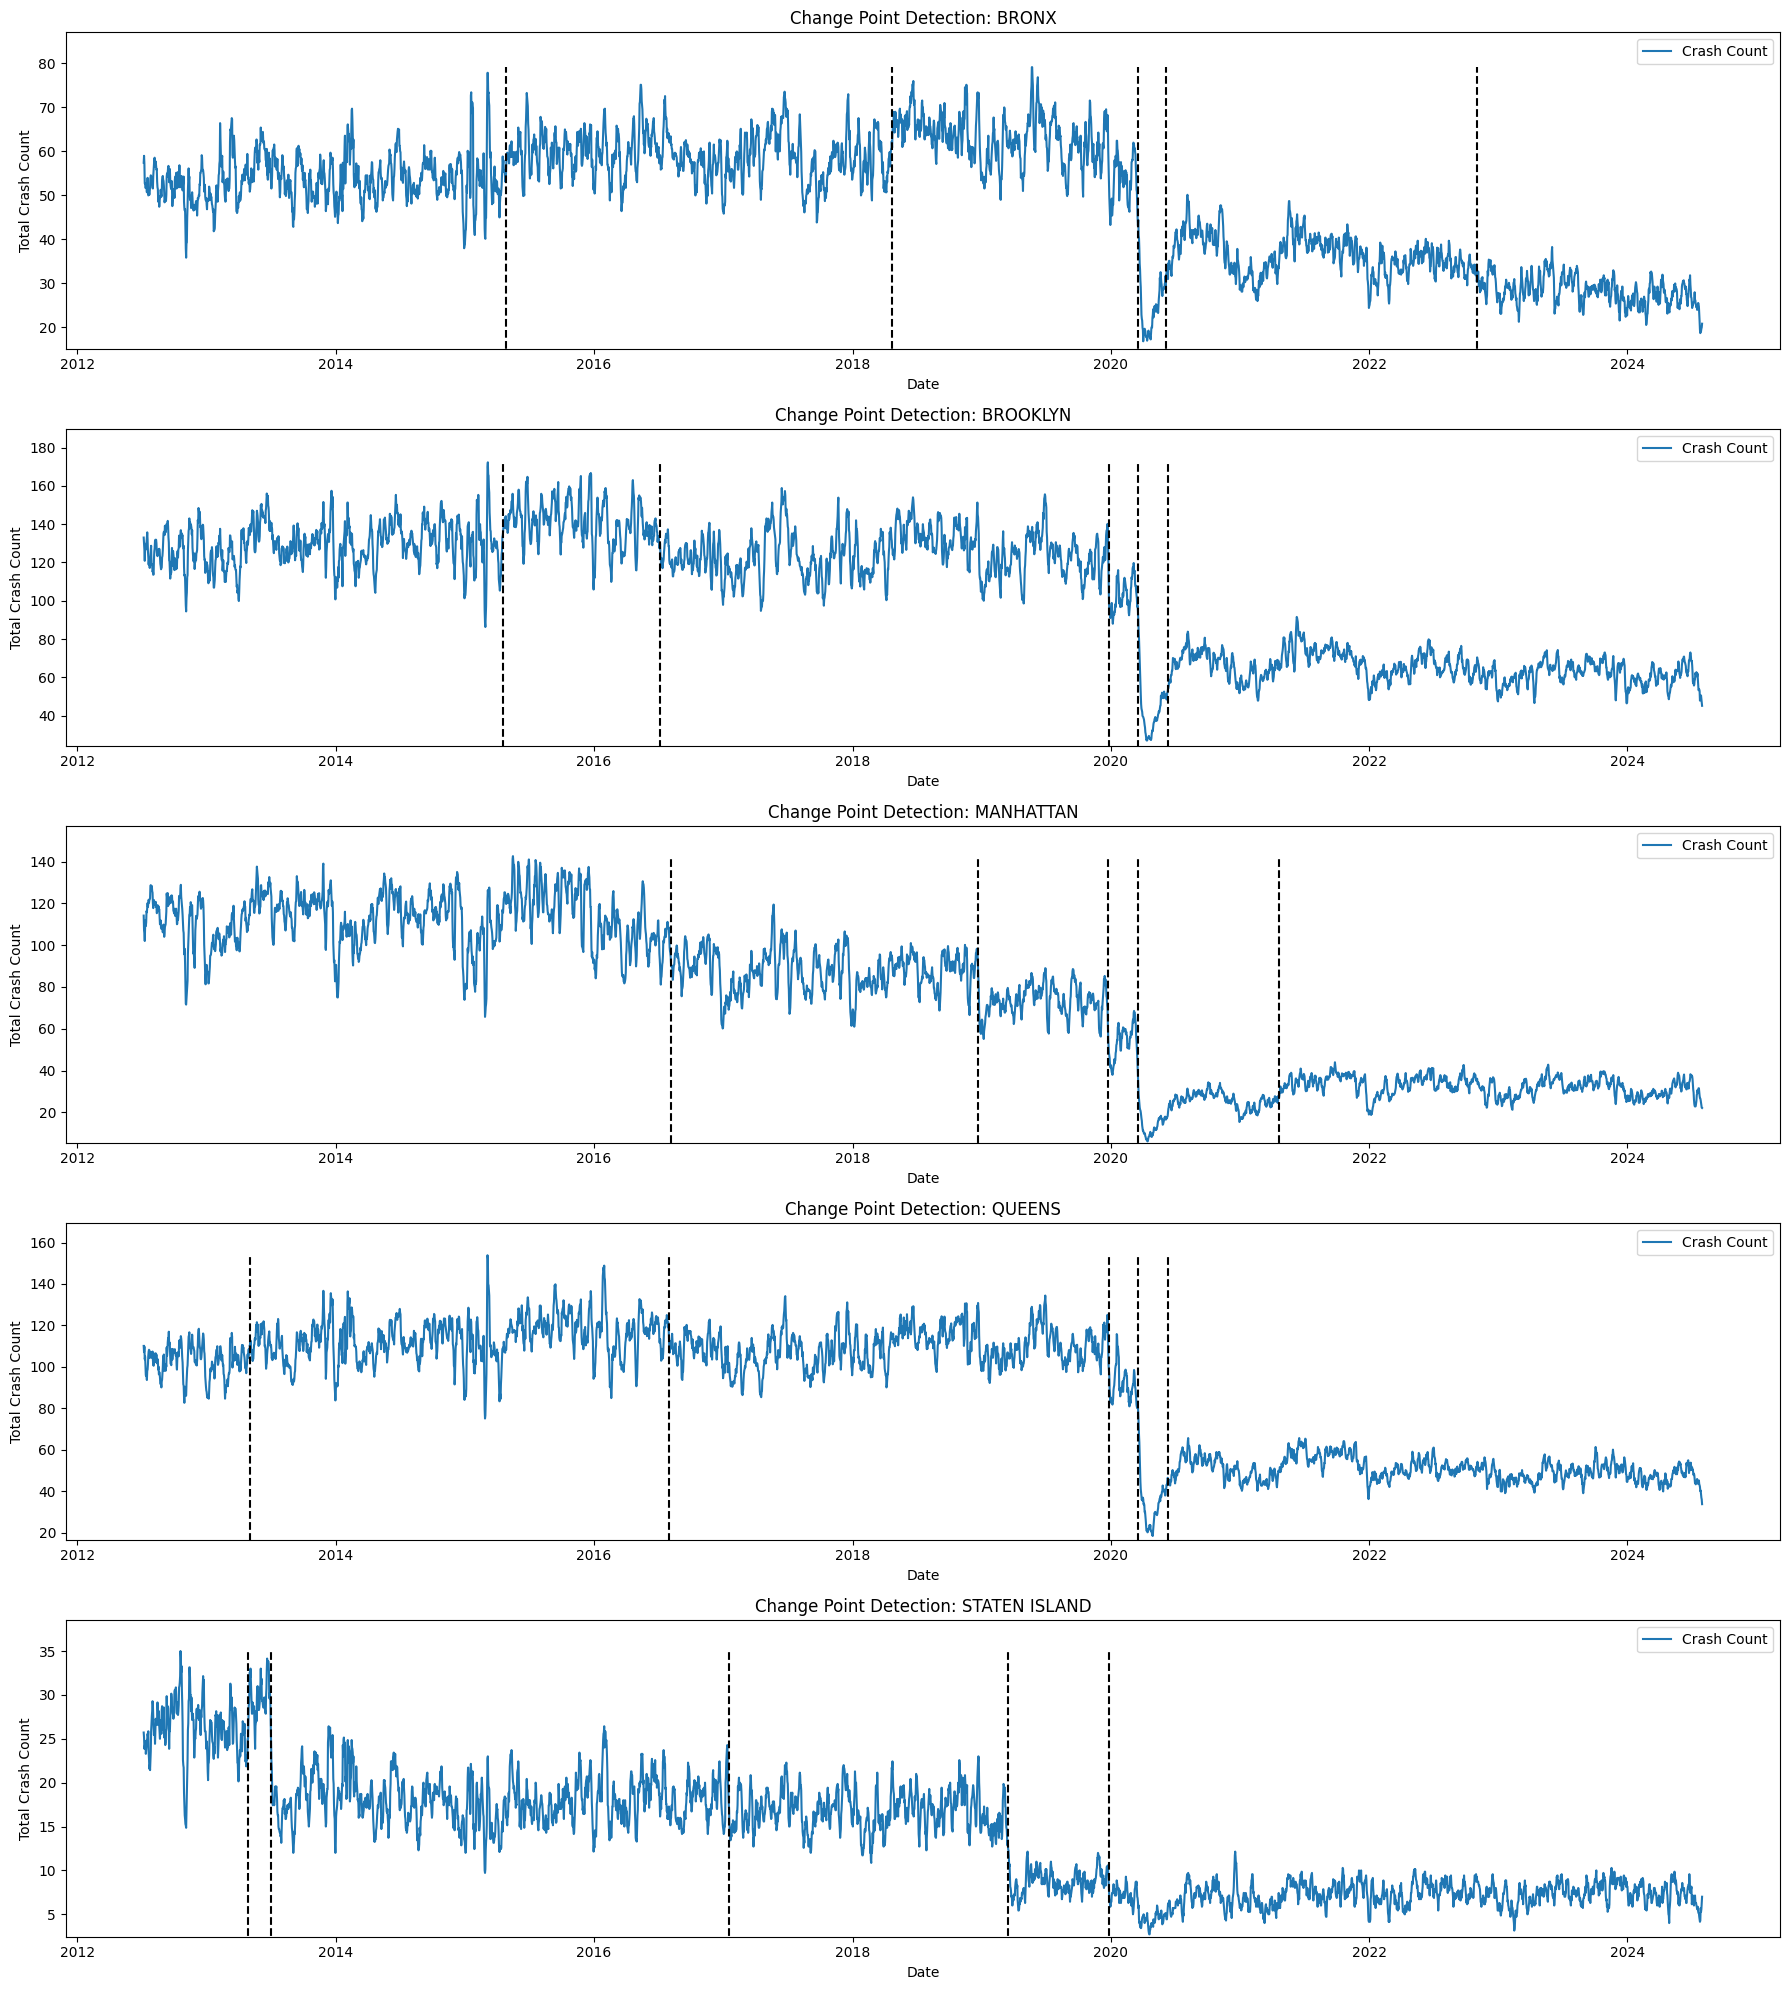

"\n# Step 4: Print Detected Change Points\nfor borough, bkps in change_points.items():\n    print(f'{borough}: Change Points at {bkps}')\n"

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

#  'data' is  original DataFrame containing crash data
# Replace 'BOROUGH' and 'CRASH DATE' with the actual column names if they differ

# Step 1: Aggregate Crash Data by Borough and Date
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
borough_crash_data = data.groupby(['BOROUGH', 'CRASH DATE']).size().unstack(fill_value=0)

# Step 2: Apply Change Point Detection for Each Borough
model = "l2"
change_points = {}

for borough, time_series in borough_crash_data.iterrows():
    time_series = time_series.rolling(7).mean().dropna()  # Apply a 7-day rolling average for smoothing

    if len(time_series) < 2:  # Skip if insufficient data
        print(f"Skipping {borough} due to insufficient data.")
        continue

    algo = rpt.Binseg(model=model).fit(time_series.to_numpy())

    # Dynamically adjust the number of breakpoints based on time series length
    n_bkps_to_find = max(0, min(5, len(time_series) // 20))

    if n_bkps_to_find == 0:
        print(f"Not enough points to detect change points for {borough}.")
        continue

    try:
        bkps = algo.predict(n_bkps=n_bkps_to_find)
        if bkps:
            bkps.pop()  # Remove the last breakpoint as it's often at the end of the data
        change_points[borough] = bkps
    except rpt.exceptions.NotEnoughPoints:
        print(f"Not enough points to detect change points for {borough}.")

#  Step3: Plot Results for Each Borough
fig, axes = plt.subplots(nrows=len(change_points), ncols=1, figsize=(18, 4 * len(change_points)))

if len(change_points) == 1:
    axes = [axes]  # Ensure axes is iterable if only one subplot

for ax, (borough, bkps) in zip(axes, change_points.items()):
    time_series = borough_crash_data.loc[borough].rolling(7).mean().dropna()

    ax.plot(time_series.index, time_series.to_numpy(), linestyle='solid', label='Crash Count')
    ax.set_ylim([0.9 * time_series.min(), 1.1 * time_series.max()])

    for bkp in bkps:
        if bkp < len(time_series):
            ax.plot([time_series.index[bkp], time_series.index[bkp]], [0, time_series.max()], '--k')

    ax.set_title(f'Change Point Detection: {borough}')
    ax.set_ylabel('Total Crash Count')
    ax.set_xlabel('Date')
    ax.legend()

plt.tight_layout()
plt.show()
'''
# Step 4: Print Detected Change Points
for borough, bkps in change_points.items():
    print(f'{borough}: Change Points at {bkps}')
'''

In [11]:
# Step 4: Print Detected Change Points of crashes  boroughwise
for borough, bkps in change_points.items():
    print(f'{borough}: Change Points at {bkps}')

BRONX: Change Points at [1025, 2115, 2810, 2890, 3770]
BROOKLYN: Change Points at [1015, 1460, 2730, 2810, 2895]
MANHATTAN: Change Points at [1490, 2360, 2725, 2810, 3210]
QUEENS: Change Points at [300, 1485, 2730, 2810, 2895]
STATEN ISLAND: Change Points at [295, 360, 1655, 2445, 2730]


**Interpretation:**

>* ***2020 is the common change year of all the locations.*** Change points occurred in different years for all these locations. Crashes decreased  in all these boroughsof newyork after 2020 drastically compared to all the previous years of it as seen above which is from 2012. At the end of 2019, pandemic was hit which kept poeople indoors but later toocrash count remained amost samejsut as in 2020 and the tremendously decreased crash count isa noticeable one. It can be due to the decrease in road trafficas most of thingsare done online which includes samller and bigger daily things ranging from purchasing milk, school admission, shopping, paying taxes etc.

>* The change points are similar for Queens and Satten Island whereas Brooklyn and Bronx share common change point years.

**Policy Recommendations:**

 >* DoT professionals  could have observed the above changes in real time and suggest necessary changes and get the infrastructure ready for further reduction of  crash rates in the all the boroughs. Significant changes occurred in Bronx after 2018 whereas in all other boroughs occurred after 2020.

## <font color='green'> ** Potential Interventions **</font>

Recommendations and possible interventions that we  offer based on our analysis.

**Step 1:** Analyzed the data to research the following question:

What are potential interventions (e.g., intersection redesign, traffic signal control optimization including adding leading pedestrian intervals, speed limit adjustment) that you would suggest to mitigate collisions between cars and vulnerable road users (VRU)?


In [13]:
import pandas as pd
# Convert 'CRASH DATE' to datetime if it's not already
data["CRASH DATE"] = pd.to_datetime(data["CRASH DATE"])

df18 = data.loc[data["CRASH DATE"].dt.year == 2018].reset_index(drop = True)
df18 = df18.dropna(subset="ZIP CODE")
df18["ZIP CODE"] = df18["ZIP CODE"].astype(int)
df18_sort = df18.groupby(['ZIP CODE']).count().sort_values(by = 'CRASH DATE', ascending = False).iloc[0: 10]
df18_sort.head()

CRASH DATE  CRASH TIME  BOROUGH  LATITUDE  LONGITUDE  LOCATION  \
ZIP CODE                                                                   
11207           2721        2721     2721      2656       2656      2656   
11236           2150        2150     2150      2136       2136      2136   
11234           2028        2028     2028      1989       1989      1989   
11385           1996        1996     1996      1962       1962      1962   
10019           1917        1917     1917      1412       1412      1412   
11101           1867        1867     1867      1813       1813      1813   
11434           1815        1815     1815      1786       1786      1786   
10036           1815        1815     1815      1570       1570      1570   
11208           1813        1813     1813      1766       1766      1766   
11226           1810        1810     1810      1799       1799      1799   

          ON STREET NAME  CROSS STREET NAME  OFF STREET NAME  \
ZIP CODE                                                       
11207               1703               1703             1018   
11236               1332               1332              818   
11234               1343               1341              685   
11385               1152               1151              844   
10019               1182               1182              735   
11101               1534               1534              333   
11434               1471               1459              344   
10036               1039               1039              776   
11208               1048               1048              765   
11226               1087               1087              723   

          NUMBER OF PERSONS INJURED  ...  CONTRIBUTING FACTOR VEHICLE 2  \
ZIP CODE                             ...                                  
11207                          2721  ...                           2222   
11236                          2150  ...                           1745   
11234                          2028  ...                           1747   
11385                          1996  ...                           1579   
10019                          1917  ...                           1689   
11101                          1867  ...                           1600   
11434                          1815  ...                           1488   
10036                          1815  ...                           1634   
11208                          1813  ...                           1403   
11226                          1810  ...                           1443   

          CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
ZIP CODE                                                                 
11207                               186                             39   
11236                               174                             49   
11234                               143                             39   
11385                               107                             21   
10019                                49                              7   
11101                                78                             11   
11434                               137                             32   
10036                                52                              5   
11208                               108                             31   
11226                               103                             32   

          CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  VEHICLE TYPE CODE 1  \
ZIP CODE                                                                     
11207                                10          2721                 2699   
11236                                13          2150                 2133   
11234                                 9          2028                 2014   
11385                                 8          1996                 1973   
10019                                 1          1917                 

<ipython-input-35-2ba0ffcbac35>:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions_df = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes_20240805.csv')
<ipython-input-35-2ba0ffcbac35>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Crashes', y='ON STREET NAME', data=high_risk_intersections, palette='Reds_d')


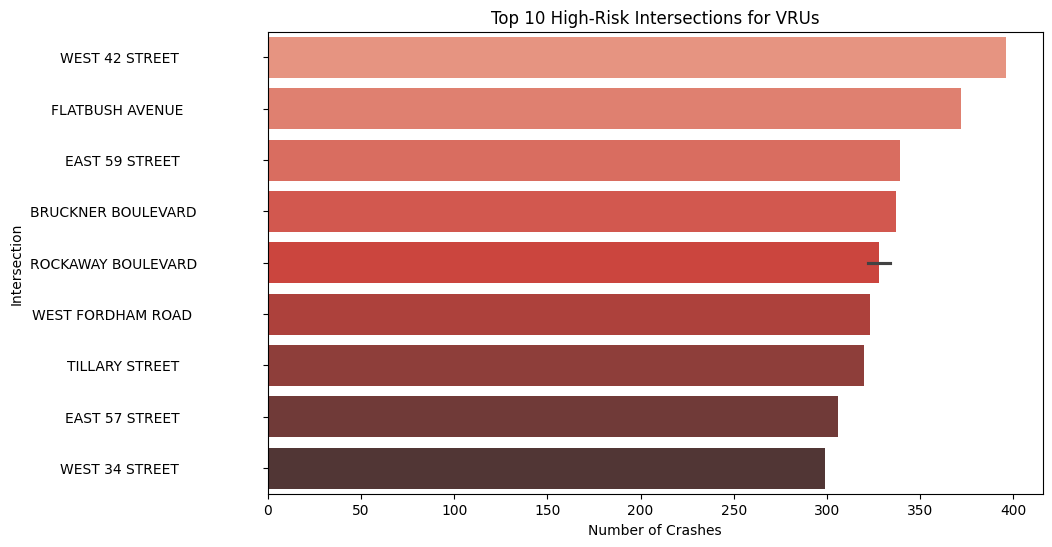

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from shapely.ops import nearest_points

# Load the Motor Vehicle Collisions dataset
collisions_df = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes_20240805.csv')

# Convert coordinates to geospatial data
collisions_df['geometry'] = collisions_df.apply(lambda x: Point(float(x['LONGITUDE']), float(x['LATITUDE'])), axis=1)
collisions_gdf = gpd.GeoDataFrame(collisions_df, geometry='geometry', crs='EPSG:4326')

# Identification of  high-risk intersections by grouping the data
high_risk_intersections = collisions_gdf.groupby(['ON STREET NAME', 'CROSS STREET NAME']).agg({
    'NUMBER OF PEDESTRIANS INJURED': 'sum',
    'NUMBER OF PEDESTRIANS KILLED': 'sum',
    'geometry': 'count'
}).rename(columns={'geometry': 'Number of Crashes'}).reset_index()

# Filter for intersections with the highest number of crashes and fatalities
high_risk_intersections = high_risk_intersections.sort_values(by=['Number of Crashes', 'NUMBER OF PEDESTRIANS KILLED'], ascending=False).head(10)

# Plot the high-risk intersections
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Crashes', y='ON STREET NAME', data=high_risk_intersections, palette='Reds_d')
plt.title('Top 10 High-Risk Intersections for VRUs')
plt.xlabel('Number of Crashes')
plt.ylabel('Intersection')
plt.show()


In [38]:
high_risk_intersections.describe()

NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
count                       10.00000                     10.000000   
mean                        10.70000                      0.200000   
std                         10.46741                      0.421637   
min                          2.00000                      0.000000   
25%                          3.50000                      0.000000   
50%                          7.00000                      0.000000   
75%                         13.50000                      0.000000   
max                         34.00000                      1.000000   

       Number of Crashes  
count          10.000000  
mean          334.800000  
std            29.412016  
min           299.000000  
25%           320.500000  
50%           328.500000  
75%           338.500000  
max           396.000000

**Analysis of Contributing factors of occurrence of crashes at  high risk intersectioned streets:**

<ipython-input-36-afafb8654511>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Crashes', y='CONTRIBUTING FACTOR VEHICLE 1', data=contributing_factors, palette='Blues_d')


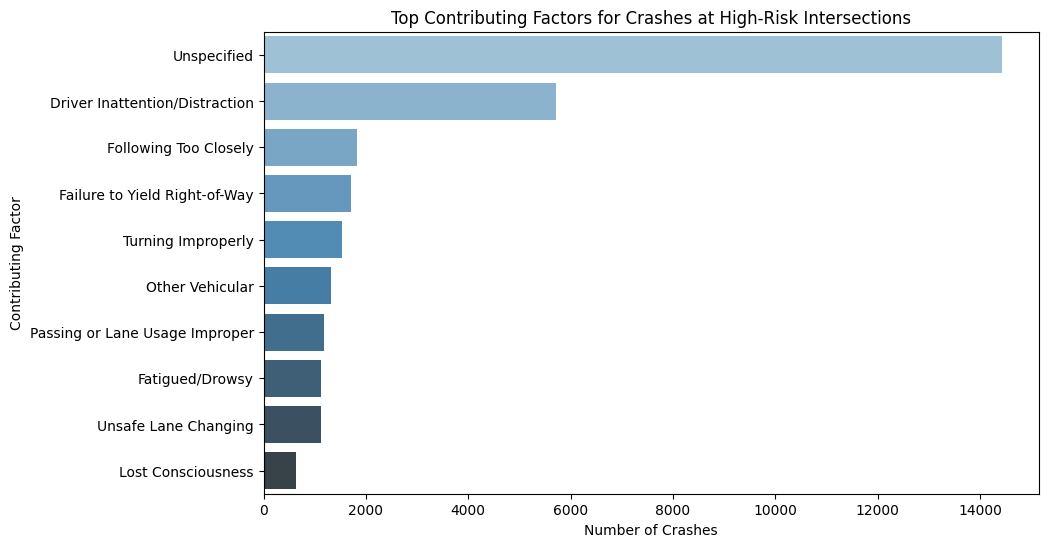

<ipython-input-36-afafb8654511>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NUMBER OF PEDESTRIANS KILLED', y='CONTRIBUTING FACTOR VEHICLE 1', data=contributing_factors, palette='Reds_d')


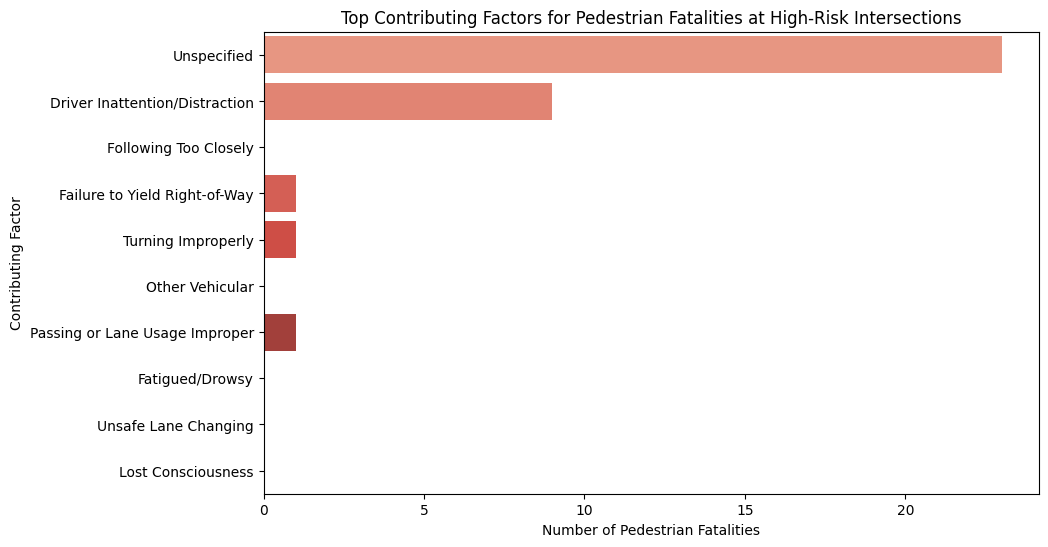

In [36]:
# Filter the original dataset for only the high-risk intersections
high_risk_streets = high_risk_intersections['ON STREET NAME'].unique()
high_risk_collisions = collisions_df[collisions_df['ON STREET NAME'].isin(high_risk_streets)]

# Group by contributing factor to identify the most common causes of crashes and fatalities
contributing_factors = high_risk_collisions.groupby('CONTRIBUTING FACTOR VEHICLE 1').agg({
    'NUMBER OF PEDESTRIANS INJURED': 'sum',
    'NUMBER OF PEDESTRIANS KILLED': 'sum',
    'NUMBER OF PERSONS INJURED': 'sum',
    'NUMBER OF PERSONS KILLED': 'sum',
    'COLLISION_ID': 'count'  # Count the number of crashes
}).rename(columns={'COLLISION_ID': 'Number of Crashes'}).reset_index()

# Sort by the highest number of crashes and fatalities
contributing_factors = contributing_factors.sort_values(by=['Number of Crashes', 'NUMBER OF PEDESTRIANS KILLED'], ascending=False).head(10)

# Plot the contributing factors for crashes
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Crashes', y='CONTRIBUTING FACTOR VEHICLE 1', data=contributing_factors, palette='Blues_d')
plt.title('Top Contributing Factors for Crashes at High-Risk Intersections')
plt.xlabel('Number of Crashes')
plt.ylabel('Contributing Factor')
plt.show()

# Plot the contributing factors for fatalities
plt.figure(figsize=(10, 6))
sns.barplot(x='NUMBER OF PEDESTRIANS KILLED', y='CONTRIBUTING FACTOR VEHICLE 1', data=contributing_factors, palette='Reds_d')
plt.title('Top Contributing Factors for Pedestrian Fatalities at High-Risk Intersections')
plt.xlabel('Number of Pedestrian Fatalities')
plt.ylabel('Contributing Factor')
plt.show()


**Insights from the above research:**
  
> *  Distraction/driver inattention is the highest contributing factor of the most number of crashes at high risk intersectioned streets and the same factoris the top most cause of pedestrian fatalities in the same high risk intersections.



**Recommendations for DOT FHWA based on your findings**:
>* Road safety campaigns for the awareness has to be conducted and it has to be taken seriously to avoid pedestrian fatalities when crashes occur due to failure to yield right of the way, improper turning and  lane usage and make sure that no drunken driving isdone by the vehicle users which causes fatige/drowsiness/unconsciousness.

>* Pedestrian islands can be created at all places so that it can be used conveniently without violating traffic rule regulations and not intervene with path of vehicle users

>* Also DOT can check if intersections can be redesigned at high risk streets  to reduce conflict points and the severity of crashes.

>* Including leading pedestrian intervals or protected turn phases to reduce conflicts between vehicles and VRUs.

These interventions can help DOT target the most dangerous areas to make the intersection more navigable for all users.


---
---

##<font color='green'>  **Research Question**</font>


**Step 1:** References: [consider the research question you want to answer](https://libraries.indiana.edu/sites/default/files/Develop_a_Research_Question.pdf)!  [who you are telling you data's story to](https://hbr.org/2013/04/how-to-tell-a-story-with-data).

Research question considering here for analysis for the potential intervention of  transportation professionals:

> *  Which zip code sees the highest amount of crashes and what recommendations can you offer to help that community?

**Step 2:**  

**Research questions:**
- Which zip code sees the highest amount of crashes and what recommendations can you offer to help that community?
- Do more crashes occur in underrepresented communities? Why or why not?
- Are older vehicles or newer vehicles involved in more crashes?
- Do the geometric features of an intersection (90 degree intersection vs skewed intersection) affect the number of crashes that occur?
- How does seat belt use affect the severity of a crash?
- How has the increase of mobile map use affected the frequency or severity of crashes?


- How many crashes, injuries, and/or fatalies occurred in a zip code of interest?
- Which zip code sees the highest amount of crashes and what recommendations can you offer to help that community? Is it an underserved community?
- Do more crashes occur in underrepresented communities? Support your conclusion.
- Which day of the week sees the most crashes, injuries, and/or fatalities? (Hint: use the same method we used when we were analyzing the average number of crashes at different times of the day!)
- Does the geometric features of an intersection (90 degree intersection vs skewed intersection) affect the number of crashes that occur?






**Step 3:**  [explore the various types of visualizations you can create to support your research](https://datavizcatalogue.com/).










**Step 4:** References -
on the **accessibility** of the graphs, charts, maps, or models

* How does your visualization appear to people with disabilities [who may not be able to distinguish between muted colors or see your chart at all?](https://chartability.fizz.studio/)
*[Color Contrast Checker](https://policyviz.com/2022/11/01/color-contrast-checker-in-excel/)
*[SAS Graphics Accelerator](https://support.sas.com/software/products/graphics-accelerator/index.html)
*[TwoTone Data Sonification Tool](https://twotone.io/about/)
*[Making Visual Studio Accessible](https://code.visualstudio.com/docs/editor/accessibility)

To make visualizations more inclusive for people with color blindness, you can choose a color palette that is colorblind-friendly. `Seaborn`, a Python visualization library, provides several palettes that are designed to be perceptible by those with color vision deficiencies. Seaborn's `cubehelix` palette is a good choice, as it was designed specifically with color blindness in mind.

**Step 5:** Visualization



Road safety is a major concern these days amongst public especially where the crash risk is higher. Knowing the highly prone crashes zip codes would help Transportation Dept. Professionals to work with atmost potential and deployment of infrastructure to minimize and avoid them as much as possible with proper action.

> *  Which zip code sees the highest amount of crashes and what recommendations can you offer to help that community?



In [ ]:
data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

The zip code with the highest number of crashes is: 11207.0 with 21312 crashes.


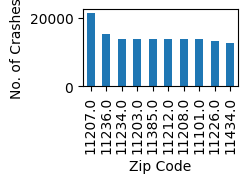

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#  DataFrame is named 'data' and has a column named 'ZIPCODE'

# Group by zip code and count crashes
crashes_by_zip = data.groupby('ZIP CODE')['COLLISION_ID'].count().sort_values(ascending=False)

# Identify the zip code with the highest number of crashes
highest_crash_zip = crashes_by_zip.index[0]
num_crashes = crashes_by_zip.iloc[0]

print(f"The zip code with the highest number of crashes is: {highest_crash_zip} with {num_crashes} crashes.")
plt.figure(figsize=(2, 1))
# Visualize the top 10 zip codes with the most crashes
crashes_by_zip.head(10).plot(kind='bar')

#plt.title('Top 10 Zip Codes with Most Crashes')
plt.xlabel('Zip Code')
plt.ylabel('No. of Crashes')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame is named 'data' and has columns like 'ZIPCODE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', etc.

# Filter data for zip code 11207.0
zip_11207_data = data[data['ZIP CODE'] == 11207.0]

# --- Analyze Contributing Factors ---

#  Time of Day - Check if 'CRASH TIME' is present and extract hour
if 'CRASH TIME' in zip_11207_data.columns:
    zip_11207_data['CRASH_HOUR'] = pd.to_datetime(zip_11207_data['CRASH TIME']).dt.hour
    crashes_by_hour = zip_11207_data.groupby('CRASH_HOUR')['COLLISION_ID'].count()
    plt.figure(figsize=(3, 1))
    crashes_by_hour.plot(kind='bar')
    #sns.barplot(x=crashes_by_hour.index, y=crashes_by_hour.values)
    #plt.title('Crashes in Zip Code 11207.0 by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Crashes')
    plt.show()
else:
    print("Column 'CRASH TIME' not found in the DataFrame. Please check the column names.")



In [ ]:
#  Day of Week
# Check if the column exists and its name. If not present, create it from 'CRASH DATE'
if 'CRASH_DAY_OF_WEEK' not in zip_11207_data.columns:
    if 'CRASH DATE' in zip_11207_data.columns:
        zip_11207_data['CRASH_DAY_OF_WEEK'] = pd.to_datetime(zip_11207_data['CRASH DATE']).dt.day_name()
    else:
        print("Neither 'CRASH_DAY_OF_WEEK' nor 'CRASH DATE' column found. Cannot analyze by day of week.")
        # Handle the case where you can't analyze by day of week

# Now  should be able to group by 'CRASH_DAY_OF_WEEK'
crashes_by_day = zip_11207_data.groupby('CRASH_DAY_OF_WEEK')['COLLISION_ID'].count()
plt.figure(figsize=(2, 1))
crashes_by_day.plot(kind='bar')
#plt.title('Crashes in Zip Code 11207.0 by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No. of Crashes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Filter for top contributing factors on Fridays
top_factors_zip11207 = zip_11207_data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head()

# Plot the distribution
plt.figure(figsize=(2, 1))
sns.barplot(x=top_factors_zip11207.index, y=top_factors_zip11207.values)
#plt.title('Top Contributing Factors in Crashes in zipcode 11207')
plt.xlabel('Contributing Factor')
plt.ylabel('No. of Crashes')
plt.xticks(rotation=45, ha='right')
plt.show()

---

##<font color='green'>**Virtual Poster Board Creation: Data Storytelling**</font>

[Which zip code sees the highest amount of crashes and what recommendations can you offer to help that community?](https://www.canva.com/design/DAGOEfQufjo/dfE_Vt8DsxX6bdinboDPpQ/edit)




 References:


*   [Virtual Poster Board Template](https://nebigdatahub.org/wp-content/uploads/2024/01/Copy-of-dsi-poster.ppt-48-×-36-in.pdf) - One-page, virtual poster may be created in PowerPoint, Google Slides, Canva, etc.
* [ Data Storytelling: How to Effectively Tell a Story with Data](https://online.hbs.edu/blog/post/data-storytelling)

* [  Consider how your visualization(s) might appear to people with varying abilities ](https://chartability.fizz.studio/)
*  [Understand your audience for an optimal presentation](https://hbr.org/2013/04/how-to-tell-a-story-with-data)





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame is named 'data' and has a column named 'ZIPCODE'

# Group by zip code and count crashes
crashes_by_zip = data.groupby('ZIP CODE')['COLLISION_ID'].count().sort_values(ascending=False)

# Identify the zip code with the highest number of crashes
highest_crash_zip = crashes_by_zip.index[0]
num_crashes = crashes_by_zip.iloc[0]

print(f"The zip code with the highest number of crashes is: {highest_crash_zip} with {num_crashes} crashes.")
#plt.figure(figsize=(2, 1))
plt.figure(figsize=(36, 12))
plt.subplot(12, 10, 1)
# Visualize the top 10 zip codes with the most crashes
crashes_by_zip.head(10).plot(kind='bar')

#plt.title('Top 10 Zip Codes with Most Crashes')
plt.xlabel('Zip Code')
plt.ylabel('No. of Crashes')
#plt.show()

# Filter data for zip code 11207.0
zip_11207_data = data[data['ZIP CODE'] == 11207.0]

# --- Analyze Contributing Factors ---
# 1. Day of Week
# Check if the column exists and its name. If not present, create it from 'CRASH DATE'
if 'CRASH_DAY_OF_WEEK' not in zip_11207_data.columns:
    if 'CRASH DATE' in zip_11207_data.columns:
        zip_11207_data['CRASH_DAY_OF_WEEK'] = pd.to_datetime(zip_11207_data['CRASH DATE']).dt.day_name()
    else:
        print("Neither 'CRASH_DAY_OF_WEEK' nor 'CRASH DATE' column found. Cannot analyze by day of week.")
        # Handle the case where you can't analyze by day of week
# 2. Time of Day - Check if 'CRASH TIME' is present and extract hour
if 'CRASH TIME' in zip_11207_data.columns:
    zip_11207_data['CRASH_HOUR'] = pd.to_datetime(zip_11207_data['CRASH TIME']).dt.hour
    crashes_by_hour = zip_11207_data.groupby('CRASH_HOUR')['COLLISION_ID'].count()
    #plt.figure(figsize=(3, 1))
    plt.subplot(12, 10, 4)
    crashes_by_hour.plot(kind='bar')
    #sns.barplot(x=crashes_by_hour.index, y=crashes_by_hour.values)
    #plt.title('Crashes in Zip Code 11207.0 by Hour of Day')
    plt.xlabel('Hour of Day')
    #plt.xticks(rotation=45, ha='right')
    #plt.ylabel('Number of Crashes')
    #plt.show()
else:
    print("Column 'CRASH TIME' not found in the DataFrame. Please check the column names.")



# Now  group by 'CRASH_DAY_OF_WEEK'
crashes_by_day = zip_11207_data.groupby('CRASH_DAY_OF_WEEK')['COLLISION_ID'].count()
#plt.figure(figsize=(2, 1))
plt.subplot(12, 10, 3)
crashes_by_day = crashes_by_day.sort_values(ascending=False)  # Sort the Series in descending order
crashes_by_day.plot(kind='bar')
#plt.title('Crashes in Zip Code 11207.0 by Day of Week')
plt.xlabel('Day of Week')
#plt.ylabel('No. of Crashes')
plt.xticks(rotation=45, ha='right')
#plt.show()

# Filter for top contributing factors on Fridays
top_factors_zip11207 = zip_11207_data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head()

# Plot the distribution
#plt.figure(figsize=(2, 1))
plt.subplot(12, 10, 2)
sns.barplot(x=top_factors_zip11207.index, y=top_factors_zip11207.values)
#plt.title('Top Contributing Factors in Crashes in zipcode 11207')
plt.xlabel('Contributing Factor')
#plt.ylabel('No. of Crashes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights from the above analysis**

Transportation Dept. should intervene on alcohol consumed drivers and divert the traffic when heavy to different pathand & also conduct public awareness campaigns about safe driving during rush hour, targeted public awareness campaigns on relevant days & targeted driver education programs inaddition to Improvement of road infrastructure, traffic calming measures, or increased signage. By acting on these recommendations, the Department of Transportation can better manage and reduce crash occurrences, even as they navigate the inherent uncertainties of future forecasts.


 **Insights after leveraging an outside resource like Google Maps:**

It is unexpected that Manhattan is not the borough with the highest number of crashes. The top collision region in year 2018 is zipcode 11207 in Brooklyn. Within this zipcode area, Broadway and Graham Avenue have the highest density of crashes; however, neither of those two streets has bike lanes.

**Recommendations & potential interventions:**

By viewing the Google Map road configuration, the commonality between these two steets is the lack of, or poor construction of, bike lanes. The street conditions remain to be improved; some bike lanes are either not marked clearly or blocked by trucks or parking vehicles. Due to these facts, **we suggest adding new bike lanes to some significant streets which have the first or second highest cycling crash rate in this region.**

---
---

## 🛺<font color='green'> **Thank you !**</font> 🛺

